Loading the models

In [7]:
from joblib import load
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

#setting the random seed
random_seed = 46
np.random.seed(random_seed)
random.seed(random_seed)

#loading in the models and datasets
reg = load("models/lin_reg.joblib")
gbr_init = load("models/gbr_init.joblib")
gbr_imp = load("models/gbr_improved.joblib")
gbr_imp_2 = load("models/gbr_improved_2.joblib")
gbr_imp_3 = load("models/gbr_improved_3.joblib")
xtratree = load("models/xtra_tree.joblib")
randfor = load("models/rfr.joblib")
dectree = load("models/dec_tree.joblib")


dataset = pd.read_csv("data/model_dataset.csv")
master_dataset = pd.read_csv("data/master_dataset.csv")
master_dataset = master_dataset[master_dataset["cases_hrs"] <= 300]
master_dataset = master_dataset[master_dataset["Total_Hours"] >= 10]


models = []


Model Evaluation

In [8]:
#testing the models 

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(labels="cases_hrs", axis=1),dataset['cases_hrs'], random_state=random_seed, train_size = .70)

#X = dataset.drop("cases_hrs", axis=1)
#y = dataset['cases_hrs']

X = X_test
y = y_test

#reg model
reg_pred = reg.predict(X)
models.append(["Base Linear Regression", mean_squared_error(reg_pred, y, squared=False), r2_score(reg_pred,y), reg.score(X, y)])

#gbr1 model
gbr_init_pred = gbr_init.predict(X)
models.append(["Base GBR", mean_squared_error(gbr_init_pred, y, squared=False), r2_score(gbr_init_pred,y), gbr_init.score(X, y)])

#improved gbr model
gbr_imp_pred = gbr_imp.predict(X)
models.append(["Improved GBR", mean_squared_error(gbr_imp_pred, y, squared=False), r2_score(gbr_imp_pred,y), gbr_imp.score(X, y)])

#improved gbr model 2.0
gbr_imp_2_pred = gbr_imp_2.predict(X)
models.append(["Improved GBR 2.0", mean_squared_error(gbr_imp_2_pred, y, squared=False), r2_score(gbr_imp_2_pred,y), gbr_imp_2.score(X, y)])

#improved gbr model 3.0
gbr_imp_3_pred = gbr_imp_3.predict(X)
models.append(["Improved GBR 3.0", mean_squared_error(gbr_imp_3_pred, y, squared=False), r2_score(gbr_imp_3_pred,y), gbr_imp_3.score(X, y)])

#xtra tree model
xtratree_pred = xtratree.predict(X)
models.append(["Xtra Tree", mean_squared_error(xtratree_pred, y, squared=False), r2_score(xtratree_pred,y), xtratree.score(X, y)])

#RFR model
randfor_pred = randfor.predict(X)
models.append(["RFR", mean_squared_error(randfor_pred, y, squared=False), r2_score(randfor_pred,y), randfor.score(X, y)])

#Dec Tree model
dectree_pred = dectree.predict(X)
models.append(["Decision Tree", mean_squared_error(dectree_pred, y, squared=False), r2_score(dectree_pred,y), dectree.score(X, y)])


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Model Presentation

In [9]:
#NOTE: I think model score and R2 are both supposed to be the same, but they give out different scores so idk
models_pres = pd.DataFrame(models, columns=["Model", "RMSE", "R2", "Model Score"])
models_pres

,Model,RMSE,R2,Model Score
0,Base Linear Regression,58.240243,-15.643524,0.050883
1,Base GBR,55.515211,-7.114905,0.137622
2,Improved GBR,62.205108,-1.349119,-0.082743
3,Improved GBR 2.0,58.555427,-1.782726,0.040582
4,Improved GBR 3.0,56.330994,-2.375881,0.112091
5,Xtra Tree,58.676171,-2.148838,0.036621
6,RFR,57.315272,-2.657303,0.080791
7,Decision Tree,76.942249,-0.680967,-0.656545


GBR 3.0 Feature Importnace & Permutation importance plot

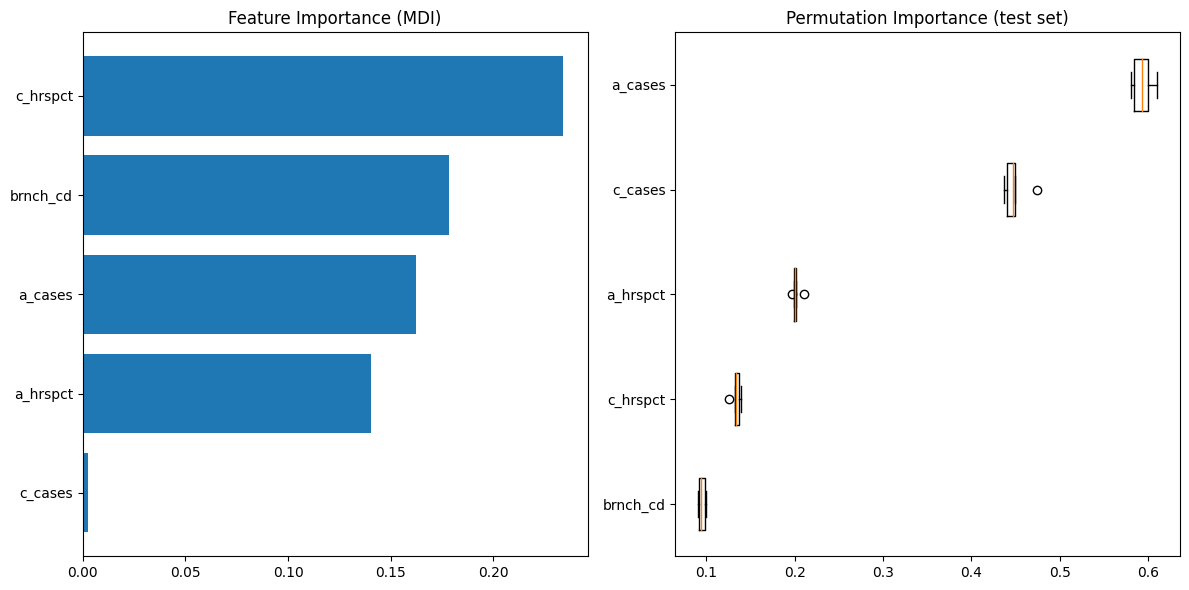

In [10]:
#gbr 3 Feature importance / Permutation importance plot 
feature_importance = gbr_imp_3.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance[:5])
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


gbr_result = permutation_importance(
    gbr_imp_3, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1
)

sorted_idx = gbr_result.importances_mean[:5].argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    gbr_result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Xtratree Feature importance / Permutation importance plot

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

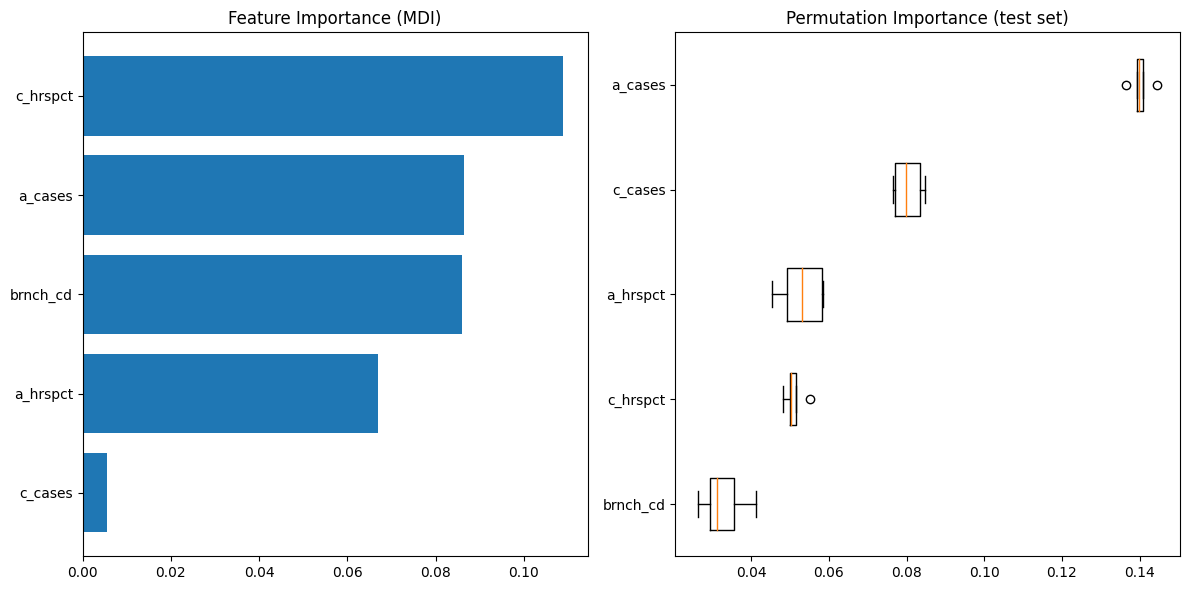

In [11]:
#Xtratree Feature importance / Permutation importance plot
feature_importance = xtratree.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance[:5])
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


xtratree_result = permutation_importance(
    xtratree, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1
)

sorted_idx = xtratree_result.importances_mean[:5].argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    xtratree_result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()

Random Forest Feature importance plot & Permutation Test

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

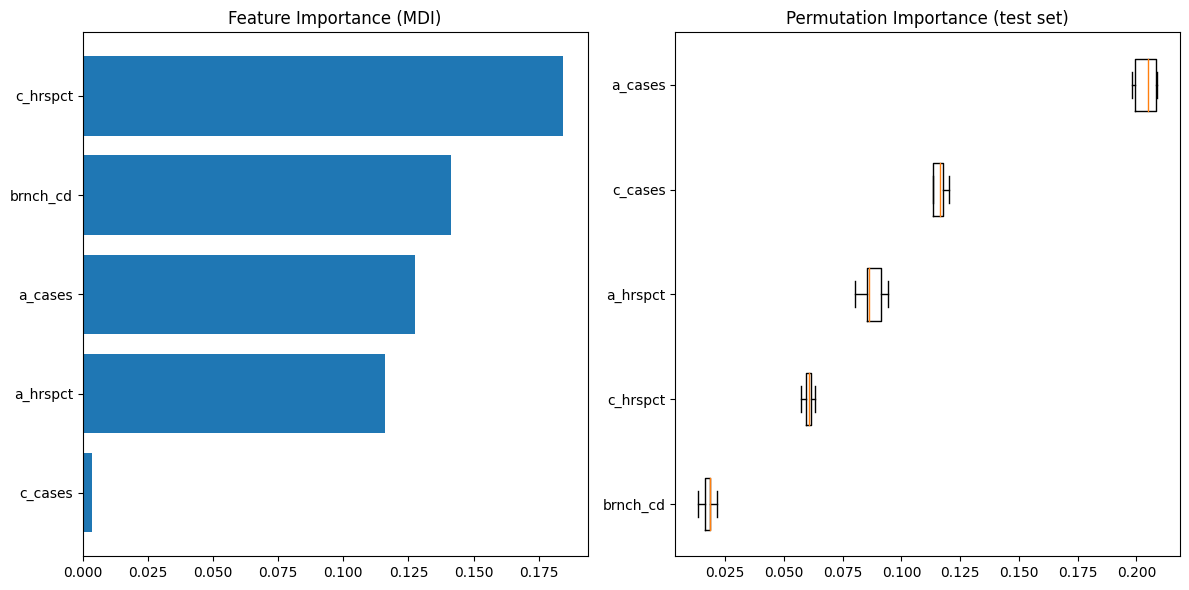

In [12]:
#Random Forest Feature importance plot 
feature_importance = randfor.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance[:5])
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

randfor_result = permutation_importance(
    randfor, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1
)

sorted_idx = randfor_result.importances_mean[:5].argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    randfor_result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()